# Multilabel classifier

### Steps:

1. Parse CSV
2. Clean and Preprocess
3. Visualize
4. Classify

### Parse CSV

We read the data from the CSV file, then we create a data frame

In [142]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

In [143]:
import csv
from pandas import DataFrame
import pandas as pd

column = ['Title','Body']
dfBA = DataFrame(columns=column)
dfT = DataFrame(columns=[0, 1, 2, 3, 4])

In [144]:
def create_data_frame(data):
    t = {}
    d = {
        'Title': [data[0]],
        'Body': [data[1]],
    }

    for n in range(5):
        if len(data[2]) > n:
            t[n] = [data[2][n]]
        else:
            t[n] = ['0']
        
    df = DataFrame(data=d)

    global dfBA, dfT
    
    dfBA = dfBA.append(df)
    dfT = dfT.append(DataFrame(data=t))

In [145]:
def parser(path):
    with open(path) as csv_file:
        reader = csv.reader(csv_file, delimiter=',')
        tags = []

        for row in reader:
            tags = tuple([x for x in row[2:-1] if x != ''])
            terms = [row[0], row[1], tags]
            create_data_frame(terms)

In [146]:
path = 'data/vzn/TrainingData.csv'
parser(path)
import pandas as pd
df = pd.concat([dfBA, dfT], axis=1)

In [147]:
dfT.head()

,0,1,2,3,4
0,Term 1,Term 2,Term 3,Term 4,Term 5
0,brand,0,0,0,0
0,brand,0,0,0,0
0,phones,apple,iphone,iphone 7,0
0,phones,apple,iphone,iphone 7,iphone 7 plus


In [148]:
dfBA.head()

,Title,Body
0,Search Query,Coded Terms
0,verizon,brand
0,verizon wireless,brand
0,iphone 7,"phones, apple, iphone, iphone 7"
0,iphone 7 plus,"phones, apple, iphone, iphone 7, iphone 7 plus"


### We parse and preproccess the data

In [149]:
from nltk.corpus import stopwords

stopWordList=stopwords.words('english')
stopWordList.remove('no')
stopWordList.remove('not')

import unicodedata
import spacy


def removeAscendingChar(data):
    data = unicodedata.normalize('NFKD', data).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return data

def removeCharDigit(text):
    str = '`1234567890-=~@#$%^&*()_+[!{;":\'><.,/?"}]'
    for w in text:
        if w in str:
            text = text.replace(w,'')
    return text

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import ToktokTokenizer


lemma = WordNetLemmatizer()
token = ToktokTokenizer()

def lemitizeWords(text):
    words = token.tokenize(text)
    listLemma = []
    for w in words:
        x = lemma.lemmatize(w, 'v')
        listLemma.append(x)
    return text

def stopWordsRemove(text):
    wordList = [x.lower().strip() for x in token.tokenize(text)]
    
    removedList = [x for x in wordList if not x in stopWordList]
    text = ' '.join(removedList)
    return text

def PreProcessing(text):
    text = removeAscendingChar(text)
    text = removeCharDigit(text)
    text = lemitizeWords(text)
    text = stopWordsRemove(text)

    return text

In [150]:
totalText = ''

for x in df['Body']:
    ps = PreProcessing(x)
    totalText = totalText + " " + ps

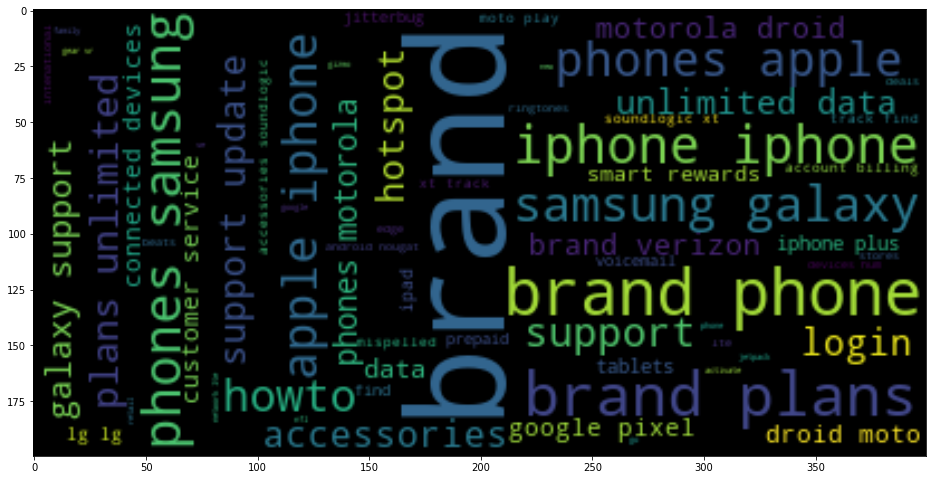

In [151]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wc = WordCloud(max_font_size=60).generate(totalText)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")

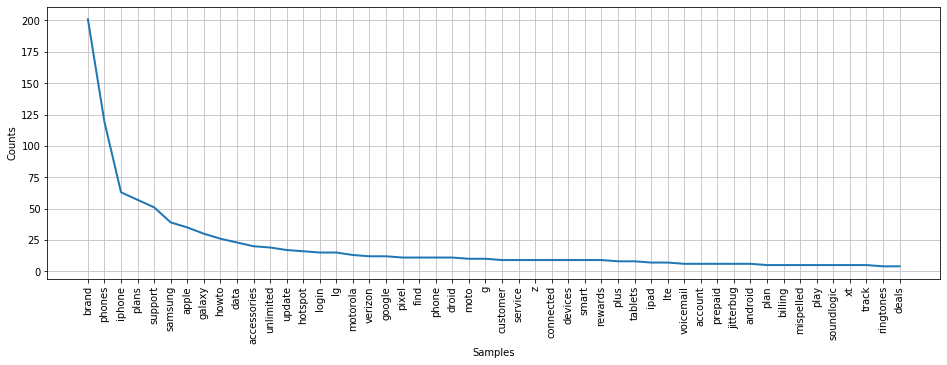

In [152]:
import nltk

freqdist = nltk.FreqDist(token.tokenize(totalText))
plt.figure(figsize=(16,5))
freqdist.plot(50)

In [153]:
totalText=''

for x in df['Title']:
    ps=PreProcessing(x)
    totalText=totalText+" "+ps

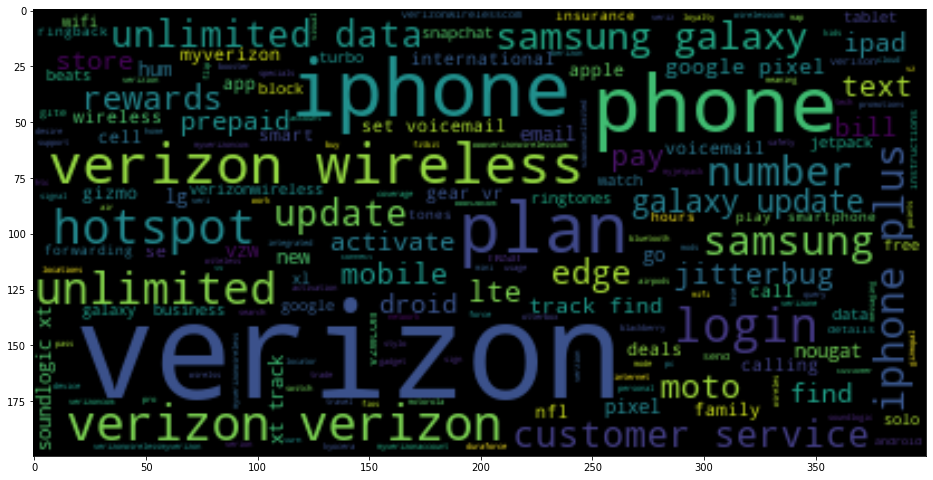

In [154]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(max_font_size=60).generate(totalText)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")



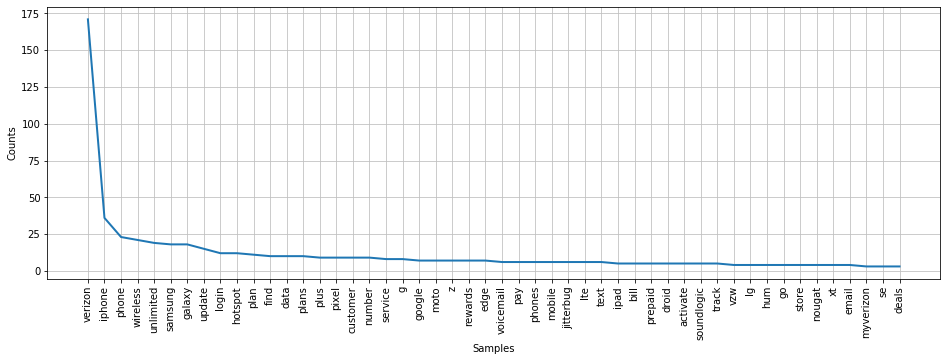

In [155]:
import nltk

freqdist = nltk.FreqDist(token.tokenize(totalText))
freqdist
plt.figure(figsize=(16,5))
freqdist.plot(50)

In [156]:
x = df.iloc[:, 0:2].values
y = df.iloc[:, 2:-1]

In [157]:
okList = []
for cl in dfT.columns:
     for n in df[cl]:
            okList.append(n)
okList = list(set(okList))
del(okList[okList.index('0')])

In [158]:
print(okList)

['verizon', ' lg', ' iphone', ' deals', ' fitbit', ' unlimited data', ' locator', 'support', ' google', ' pre-paid ', 'connected devices', ' s7', ' billing', ' lg gizmo gadget', ' Location', ' news', ' insurance', ' business', ' data plan', ' iphone 6', ' jetpack', ' moto', 'Term 2', 'brand Contact', ' account', ' tablets', ' what is', ' stores', ' j3', ' galaxy', 'brand', ' XT track and find', ' lg stylo 2', ' lg g4', 'tablets', 'What is 4G LTE', ' moto mods', 'phone', 'fios', ' nfl', ' iphone 6s plus', 'brand phones Kids', ' iphone 6 plus', ' phone number', 'Term 5', ' activate', ' data plans', ' voicemail', 'hotspot', ' hotspot', ' family plans', ' my jetpack', ' iphone 7 plus', ' fios', ' apple', ' phones', ' network', ' s6', ' headphones', ' how-to', ' promotions', 'Term 3', ' droid', ' signal booster', 'brand Locations', ' ipad air 2', 'Misspelled brand', ' connected devices', ' support', ' plans', ' beats', ' htc', ' moto z force', ' iphone se', ' lg gizmo', ' blackberry', 'phon

In [159]:
newDF = DataFrame(columns=okList)

In [160]:
for x in range(dfT.count()[0]):
    someDict = {}
    for d in okList:
        rowdata = list(dfT.iloc[x])
        if d in rowdata:
            someDict[d] = 1
        else:
            someDict[d] = 0
    newDF = newDF.append(someDict,ignore_index=True)

In [161]:
newDF.head()

,verizon,lg,iphone,deals,fitbit,unlimited data,locator,support,google,pre-paid,...,hours,Pixel,go90,airpods,brand Plans,turbo,asus,ringtones,google home,brand How-to
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
dfBA.index = range(dfBA.count()[0])
df = dfBA.join(newDF)
df = df.convert_objects(convert_numeric=True)

/anaconda3/envs/multilabel/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [163]:
df[['Title', 'brand', 'phones']]

,Title,brand,phones
0,Search Query,0,0
1,verizon,1,0
2,verizon wireless,1,0
3,iphone 7,0,1
4,iphone 7 plus,0,1
5,my verizon,1,0
6,verizon wireless login,1,0
7,google pixel,0,1
8,iphone 6,0,1
9,verizon customer service,1,0


### Number of queries in each category

In [164]:
df_toxic = df.drop(['Title'], axis=1)
counts = []
categories = list(df_toxic.columns.values)
for i in categories:
    counts.append((i, df_toxic[i].sum()))
df_stats = pd.DataFrame(counts, columns=['label', 'number_of_queries'])
df_stats.head()

,label,number_of_queries
0,Body,"Coded Termsbrandbrandphones, apple, iphone, ip..."
1,verizon,1
2,lg,8
3,iphone,29
4,deals,4


Text(0.5, 0, '# of labels')

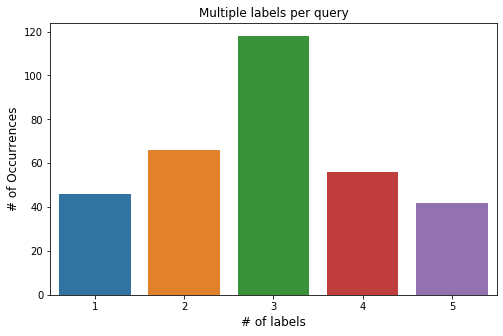

In [165]:
rowsums = df.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple labels per query")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of labels', fontsize=12)

In [166]:
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)

X_train = train.Title
X_test = test.Title
print(X_train.shape)
print(X_test.shape)
X_test

(219,)
(109,)


231               verizon data plans
110           verizon wireless deals
250                 cell phone plans
9           verizon customer service
93                  visual voicemail
220        verizon unlimited hotspot
309                   4g lte network
199              verizon apple watch
204                     moto z droid
101                            gizmo
181                 verison wireless
312                     verizon fios
320               samsung s6 verizon
139                  verizon wirelss
266           s7 edge nougat verizon
153          verizon call forwarding
146               google pixel phone
144                           fitbit
25                             pixel
5                         my verizon
82               verizon phone deals
179        verizonwireless/myverizon
46                   verizon rewards
290                       what is 4g
94               verizon cloud login
323           verizon ringback tones
114           activate verizon phone
1

In [167]:
df.dtypes

Title                  object
Body                   object
verizon                 int64
 lg                     int64
 iphone                 int64
 deals                  int64
 fitbit                 int64
 unlimited data         int64
 locator                int64
support                 int64
 google                 int64
 pre-paid               int64
connected devices       int64
 s7                     int64
 billing                int64
 lg gizmo gadget        int64
 Location               int64
 news                   int64
 insurance              int64
 business               int64
 data plan              int64
 iphone 6               int64
 jetpack                int64
 moto                   int64
Term 2                  int64
brand Contact           int64
 account                int64
 tablets                int64
 what is                int64
 stores                 int64
                        ...  
 pre-paid               int64
 mispelled              int64
 accessori

### Naive Bayes

In [178]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

print(okList)

for label in okList:
    print('... Processing {}'.format(label))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[label])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    #print(test[label])
    print(prediction)
    #print('Test accuracy is {}'.format(accuracy_score(test[label], prediction)))

['verizon', ' lg', ' iphone', ' deals', ' fitbit', ' unlimited data', ' locator', 'support', ' google', ' pre-paid ', 'connected devices', ' s7', ' billing', ' lg gizmo gadget', ' Location', ' news', ' insurance', ' business', ' data plan', ' iphone 6', ' jetpack', ' moto', 'Term 2', 'brand Contact', ' account', ' tablets', ' what is', ' stores', ' j3', ' galaxy', 'brand', ' XT track and find', ' lg stylo 2', ' lg g4', 'tablets', 'What is 4G LTE', ' moto mods', 'phone', 'fios', ' nfl', ' iphone 6s plus', 'brand phones Kids', ' iphone 6 plus', ' phone number', 'Term 5', ' activate', ' data plans', ' voicemail', 'hotspot', ' hotspot', ' family plans', ' my jetpack', ' iphone 7 plus', ' fios', ' apple', ' phones', ' network', ' s6', ' headphones', ' how-to', ' promotions', 'Term 3', ' droid', ' signal booster', 'brand Locations', ' ipad air 2', 'Misspelled brand', ' connected devices', ' support', ' plans', ' beats', ' htc', ' moto z force', ' iphone se', ' lg gizmo', ' blackberry', 'phon

/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/l

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
... Processing  lg g4
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
... Processing tablets
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
... Processing What is 4G LTE
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
... Processing  moto mods
[0 0 0 0 0 

/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
... Processing  signal booster
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
... Processing brand Locations
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
... Processing  ipad air 2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
... Processing Misspell

/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/l

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
... Processing  z8 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
... Processing  new
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
... Processing  ipad
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
... Processing  moto z play
[0 0 0 0 0 0 0 0 0 0 0 

/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/l

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
... Processing  trade-in
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
... Processing  desire 530
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
... Processing  lg gizmo watch
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
... Processing  pre-paid
[0 0

/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


### LinearSVC

In [118]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
for label in okList:
    print('... Processing {}'.format(label))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[label])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[label], prediction)))

... Processing verizon
Test accuracy is 0.9908256880733946
... Processing  lg
Test accuracy is 1.0
... Processing  iphone
Test accuracy is 1.0
... Processing  deals
Test accuracy is 0.963302752293578
... Processing  fitbit
Test accuracy is 0.9908256880733946
... Processing  unlimited data
Test accuracy is 0.9908256880733946
... Processing  locator
Test accuracy is 0.9908256880733946
... Processing support
Test accuracy is 0.9724770642201835
... Processing  google
Test accuracy is 0.9724770642201835
... Processing  pre-paid 
Test accuracy is 0.9908256880733946
... Processing connected devices
Test accuracy is 1.0
... Processing  s7
Test accuracy is 0.9908256880733946
... Processing  billing
Test accuracy is 1.0
... Processing  lg gizmo gadget
Test accuracy is 0.9908256880733946
... Processing  Location
Test accuracy is 1.0
... Processing  news
Test accuracy is 1.0
... Processing  insurance
Test accuracy is 1.0
... Processing  business
Test accuracy is 0.9908256880733946
... Processing  

/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/l

Test accuracy is 1.0
... Processing  lg stylo 2
Test accuracy is 1.0
... Processing  lg g4
Test accuracy is 0.9908256880733946
... Processing tablets
Test accuracy is 0.981651376146789
... Processing What is 4G LTE
Test accuracy is 1.0
... Processing  moto mods
Test accuracy is 1.0
... Processing phone
Test accuracy is 0.9908256880733946
... Processing fios
Test accuracy is 0.9908256880733946
... Processing  nfl
Test accuracy is 1.0
... Processing  iphone 6s plus
Test accuracy is 0.9724770642201835
... Processing brand phones Kids
Test accuracy is 1.0
... Processing  iphone 6 plus
Test accuracy is 1.0
... Processing  phone number
Test accuracy is 1.0
... Processing Term 5
Test accuracy is 1.0
... Processing  activate
Test accuracy is 1.0
... Processing  data plans
Test accuracy is 0.9724770642201835
... Processing  voicemail
Test accuracy is 1.0
... Processing hotspot
Test accuracy is 1.0
... Processing  hotspot
Test accuracy is 0.981651376146789
... Processing  family plans
Test accur

/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


Test accuracy is 1.0
... Processing  ipad air 2
Test accuracy is 1.0
... Processing Misspelled brand
Test accuracy is 0.9908256880733946
... Processing  connected devices
Test accuracy is 0.9908256880733946
... Processing  support
Test accuracy is 0.926605504587156
... Processing  plans
Test accuracy is 0.944954128440367
... Processing  beats
Test accuracy is 1.0
... Processing  htc
Test accuracy is 0.9908256880733946
... Processing  moto z force
Test accuracy is 1.0
... Processing  iphone se
Test accuracy is 1.0
... Processing  lg gizmo
Test accuracy is 0.9908256880733946
... Processing  blackberry
Test accuracy is 1.0
... Processing phones
Test accuracy is 0.9357798165137615
... Processing Partial brand
Test accuracy is 0.9908256880733946
... Processing  my verizon
Test accuracy is 0.981651376146789
... Processing  beats solo 2 wireless
Test accuracy is 0.9908256880733946
... Processing  phone cases
Test accuracy is 0.9908256880733946
... Processing  Google
Test accuracy is 0.9724770

/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/l

Test accuracy is 0.9908256880733946
... Processing  jitterbug
Test accuracy is 1.0
... Processing  beats solo 2
Test accuracy is 0.9908256880733946
... Processing  hum
Test accuracy is 1.0
... Processing Term 4
Test accuracy is 1.0
... Processing  zenpad
Test accuracy is 1.0
... Processing  kyocera
Test accuracy is 0.9908256880733946
... Processing Hotspot
Test accuracy is 1.0
... Processing  intenational
Test accuracy is 1.0
... Processing  JItterbug
Test accuracy is 0.981651376146789
... Processing  smart rewards
Test accuracy is 1.0
... Processing  coverage map
Test accuracy is 0.9908256880733946
... Processing brand Retail Proximity
Test accuracy is 0.9908256880733946
... Processing What is LTE
Test accuracy is 1.0
... Processing  iphone 7
Test accuracy is 0.9908256880733946
... Processing  find my phone
Test accuracy is 1.0
... Processing  lg g5
Test accuracy is 1.0
... Processing  moto z
Test accuracy is 0.9908256880733946
... Processing  switch
Test accuracy is 0.990825688073394

/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/l

Test accuracy is 0.9908256880733946
... Processing  unlimited
Test accuracy is 0.981651376146789
... Processing brand Plans Prepaid
Test accuracy is 1.0
... Processing  samsung gear vr
Test accuracy is 1.0
... Processing  wifi calling
Test accuracy is 1.0
... Processing  android
Test accuracy is 1.0
... Processing  customer service
Test accuracy is 1.0
... Processing What is 4G 
Test accuracy is 0.981651376146789
... Processing  motorola
Test accuracy is 0.981651376146789
... Processing How-to
Test accuracy is 1.0
... Processing  log-in
Test accuracy is 0.9541284403669725
... Processing  soundlogic
Test accuracy is 1.0
... Processing accessories
Test accuracy is 0.981651376146789
... Processing  cloud
Test accuracy is 0.981651376146789
... Processing  duraforce pro
Test accuracy is 0.9908256880733946
... Processing  s5
Test accuracy is 1.0
... Processing  hours
Test accuracy is 0.9908256880733946
... Processing  Pixel
Test accuracy is 0.9724770642201835
... Processing  go90
Test accura

/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


### Logistic Regression

In [119]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Body


/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test accuracy is 0.1926605504587156
... Processing verizon
Test accuracy is 0.9908256880733946
... Processing  lg
Test accuracy is 0.9724770642201835
... Processing  iphone
Test accuracy is 0.963302752293578
... Processing  deals
Test accuracy is 0.963302752293578
... Processing  fitbit
Test accuracy is 0.9908256880733946
... Processing  unlimited data
Test accuracy is 0.963302752293578
... Processing  locator
Test accuracy is 0.9908256880733946
... Processing support
Test accuracy is 0.963302752293578
... Processing  google
Test accuracy is 0.9908256880733946
... Processing  pre-paid 
Test accuracy is 0.9908256880733946
... Processing connected devices
Test accuracy is 0.981651376146789
... Processing  s7
Test accuracy is 0.963302752293578
... Processing  billing
Test accuracy is 1.0
... Processing  lg gizmo gadget
Test accuracy is 0.9908256880733946
... Processing  Location
Test accuracy is 1.0
... Processing  news
Test accuracy is 1.0
... Processing  insurance
Test accuracy is 1.0
.

/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did n

Test accuracy is 0.9908256880733946
... Processing  what is
Test accuracy is 1.0
... Processing  stores
Test accuracy is 0.963302752293578
... Processing  j3
Test accuracy is 1.0
... Processing  galaxy
Test accuracy is 0.944954128440367
... Processing brand
Test accuracy is 0.8807339449541285
... Processing  XT track and find
Test accuracy is 1.0
... Processing  lg stylo 2
Test accuracy is 1.0
... Processing  lg g4
Test accuracy is 0.9908256880733946
... Processing tablets
Test accuracy is 0.981651376146789
... Processing What is 4G LTE
Test accuracy is 1.0
... Processing  moto mods
Test accuracy is 1.0
... Processing phone
Test accuracy is 0.9908256880733946
... Processing fios
Test accuracy is 0.9908256880733946
... Processing  nfl
Test accuracy is 1.0
... Processing  iphone 6s plus
Test accuracy is 1.0
... Processing brand phones Kids
Test accuracy is 1.0
... Processing  iphone 6 plus
Test accuracy is 1.0
... Processing  phone number
Test accuracy is 1.0
... Processing Term 5
Test a

/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/ana

Test accuracy is 0.981651376146789
... Processing  my jetpack
Test accuracy is 1.0
... Processing  iphone 7 plus
Test accuracy is 1.0
... Processing  fios
Test accuracy is 1.0
... Processing  apple
Test accuracy is 0.9541284403669725
... Processing  phones
Test accuracy is 0.8532110091743119
... Processing  network
Test accuracy is 0.9908256880733946
... Processing  s6
Test accuracy is 0.9541284403669725
... Processing  headphones
Test accuracy is 1.0
... Processing  how-to
Test accuracy is 0.981651376146789
... Processing  promotions
Test accuracy is 1.0
... Processing Term 3
Test accuracy is 1.0
... Processing  droid
Test accuracy is 0.963302752293578
... Processing  signal booster
Test accuracy is 1.0
... Processing brand Locations
Test accuracy is 1.0
... Processing  ipad air 2
Test accuracy is 1.0
... Processing Misspelled brand
Test accuracy is 1.0
... Processing  connected devices
Test accuracy is 0.981651376146789
... Processing  support
Test accuracy is 0.9357798165137615
... 

/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarni

Test accuracy is 1.0
... Processing  iphone se
Test accuracy is 0.9908256880733946
... Processing  lg gizmo
Test accuracy is 0.9908256880733946
... Processing  blackberry
Test accuracy is 1.0
... Processing phones
Test accuracy is 0.8623853211009175
... Processing Partial brand
Test accuracy is 0.9908256880733946
... Processing  my verizon
Test accuracy is 0.963302752293578
... Processing  beats solo 2 wireless
Test accuracy is 0.9908256880733946
... Processing  phone cases
Test accuracy is 0.9908256880733946
... Processing  Google
Test accuracy is 0.9724770642201835
... Processing  lgv20
Test accuracy is 1.0
... Processing  pixel
Test accuracy is 0.9908256880733946
... Processing  4G LTE
Test accuracy is 0.9908256880733946
... Processing  pixel xl
Test accuracy is 1.0
... Processing  otterbox
Test accuracy is 0.9908256880733946
... Processing  flip phones
Test accuracy is 0.9908256880733946
... Processing how-to
Test accuracy is 0.981651376146789
... Processing  ipad mini 
Test accura

/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/mul

Test accuracy is 0.9724770642201835
... Processing  samsung
Test accuracy is 0.944954128440367
... Processing  jitterbug
Test accuracy is 1.0
... Processing  beats solo 2
Test accuracy is 1.0
... Processing  hum
Test accuracy is 0.9908256880733946
... Processing Term 4
Test accuracy is 1.0
... Processing  zenpad
Test accuracy is 1.0
... Processing  kyocera
Test accuracy is 0.9908256880733946
... Processing Hotspot
Test accuracy is 1.0
... Processing  intenational
Test accuracy is 1.0
... Processing  JItterbug
Test accuracy is 0.981651376146789
... Processing  smart rewards
Test accuracy is 0.9724770642201835
... Processing  coverage map
Test accuracy is 0.9908256880733946
... Processing brand Retail Proximity
Test accuracy is 1.0
... Processing What is LTE
Test accuracy is 1.0
... Processing  iphone 7
Test accuracy is 0.9908256880733946
... Processing  find my phone
Test accuracy is 0.9908256880733946
... Processing  lg g5
Test accuracy is 1.0
... Processing  moto z
Test accuracy is 0.

/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 


... Processing Term 1
Test accuracy is 1.0
... Processing brand Retail
Test accuracy is 1.0
... Processing  trade-in
Test accuracy is 0.9908256880733946
... Processing  desire 530
Test accuracy is 0.9908256880733946
... Processing  lg gizmo watch
Test accuracy is 1.0
... Processing  pre-paid
Test accuracy is 1.0
... Processing  mispelled
Test accuracy is 0.981651376146789
... Processing  accessories
Test accuracy is 1.0
... Processing  apple watch
Test accuracy is 0.9908256880733946
... Processing  near me
Test accuracy is 0.9908256880733946
... Processing  unlimited
Test accuracy is 0.9908256880733946
... Processing brand Plans Prepaid
Test accuracy is 1.0
... Processing  samsung gear vr
Test accuracy is 1.0
... Processing  wifi calling
Test accuracy is 1.0
... Processing  android
Test accuracy is 1.0
... Processing  customer service
Test accuracy is 0.9724770642201835
... Processing What is 4G 
Test accuracy is 0.981651376146789
... Processing  motorola
Test accuracy is 0.9633027522

/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/ana

Test accuracy is 0.9908256880733946
... Processing  Pixel
Test accuracy is 0.9724770642201835
... Processing  go90
Test accuracy is 1.0
... Processing  airpods
Test accuracy is 1.0
... Processing brand Plans
Test accuracy is 0.9908256880733946
... Processing  turbo
Test accuracy is 1.0
... Processing  asus
Test accuracy is 1.0
... Processing  ringtones
Test accuracy is 0.981651376146789
... Processing  google home
Test accuracy is 1.0
... Processing brand How-to
Test accuracy is 0.981651376146789


/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/envs/multilabel/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarni